<h1>Distribuição de Respiradores em 2020 no Brasil<h1/>
<small>por Rafael Ribeiro</small>

<h2>Motivação</h2>
<p>Além da COVID-19, outro assunto tomou os telejornais foi a a falta de respiradores nos hospitais para atender os casos mais graves da doença.</p>
<p>Diante desta situação, e procurando meu primeiro dataset para analisar,resolvi me desafiar a extrair e sintetizar um pouco os dados que estão no dataset <a href = "http://sage.saude.gov.br/dados/repositorio/distribuicao_respiradores.csv">distribuicao_respiradores.csv</a>, baixado no dia 20/11/2020, que está no Portal Brasileiro de Dados Abertos e contém informações sobre respiradores distribuídos pelo Ministério da Saúde a estados e municípios.</p>
<p>Nesse dataset teremos informações como: Fornecedor, tipo do respirador, quantidade, destino,valor, dentre outras.</p>
<br>
<h2>Vou explorar esse dataset para responder as seguintes perguntas:<h2/>
<ul>
  <li>Qual o nome das empresas fornecedoras?</li>
  <li>Qual a quantidade de respiradores comprados de cada empresa?</li>
  <li>Qual a quantidade total de respiradores comprados?</li>
  <li>Quais os tipos de respiradores?</li>
  <li>Qual a quantidade de respiradores distribuídos para cada estado?</li>
  <li>Quantos respiradores de cada tipo foi enviado para cada estado?</li>
  <li>Qual o valor das compras dos respiradores por estado?</li>
  <li> Qual é o valor total das compras?</li>
<ul/>







# Importando as bibliotecas que serão utilizadas.

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h2>Analisando os dados</h2>

In [236]:
df = pd.read_csv('/content/distribuicao_respiradores.csv',sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATA              1715 non-null   object
 1   FORNECEDOR        1715 non-null   object
 2   DESTINO           1715 non-null   object
 3   ESTADO/MUNICIPIO  1715 non-null   object
 4   TIPO              1715 non-null   object
 5   QUANTIDADE        1715 non-null   int64 
 6   VALOR             1715 non-null   object
 7   DESTINATARIO      1715 non-null   object
 8   UF                1715 non-null   object
 9   DATA DE ENTREGA   1715 non-null   object
dtypes: int64(1), object(9)
memory usage: 134.1+ KB


*Temos 1715 linhas(registros de compas) e 10 colunas.*
*A coluna VALOR não está como float64 e preciso convertê-la para poder fazer cálculos. As colunas DATA e DATA DE ENTREGA para serem utilizadas para verificar as datas, precisam ser convertidas para datetime64.*

In [237]:
#Convertendo as colunas de data
df['DATA'] = pd.to_datetime(df['DATA'],errors='coerce')
df['DATA DE ENTREGA'] = pd.to_datetime(df['DATA DE ENTREGA'],errors='coerce')


In [238]:
#convertendo a coluna valor para float
df['VALOR'] = df['VALOR'].apply(lambda x:str(x).replace(',','.'))
df['VALOR'] = df['VALOR'].astype('float64')

In [239]:
#Coluna VALOR  e colunas de datas convertidas convertida!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA              1713 non-null   datetime64[ns]
 1   FORNECEDOR        1715 non-null   object        
 2   DESTINO           1715 non-null   object        
 3   ESTADO/MUNICIPIO  1715 non-null   object        
 4   TIPO              1715 non-null   object        
 5   QUANTIDADE        1715 non-null   int64         
 6   VALOR             1715 non-null   float64       
 7   DESTINATARIO      1715 non-null   object        
 8   UF                1715 non-null   object        
 9   DATA DE ENTREGA   1712 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 134.1+ KB


*Colunas DATA e DATA DE ENTREGA convertidas*

In [240]:
#O arquivo foi criado em 11 de Agosto de 2020, mas mesmo assim, vou verificar se existe algum registro com data anterior a 2020. 
df[df['DATA']<'2020-01-01'].value_counts().sum()

0

*Não existe registro anterior a 2020*

In [241]:
#Verificando se existem linhas duplicadas
df.duplicated().sum()
#Possui 22 linhas duplicadas

22

*Existem 22 linhas duplicadas, então irei removê-las.*

In [242]:
#Excluindo as linhas duplicadas
df = df.drop_duplicates()
df.duplicated().sum()

0

*Linhas duplicadas removidas*

*Como não utilizarei algumas colunas, vou retirá-las*

In [243]:
df.columns

Index(['DATA', 'FORNECEDOR', 'DESTINO', 'ESTADO/MUNICIPIO', 'TIPO',
       'QUANTIDADE', 'VALOR', 'DESTINATARIO', 'UF', 'DATA DE ENTREGA'],
      dtype='object')

In [244]:
df = df[[ 'FORNECEDOR', 'DESTINO', 'TIPO','QUANTIDADE', 'VALOR', 'DESTINATARIO','ESTADO/MUNICIPIO']]

*Mantive apenas as colunas FORNECEDOR, DESTINO, TIPO, QUANTIDADE, VALOR,*   *DESTINATARIO*

In [245]:
df.head(3)

,FORNECEDOR,DESTINO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,ESTADO/MUNICIPIO
0,VYAIRE,RIO DE JANEIRO,UTI,40,2400000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,ESTADO
1,VYAIRE,RIO DE JANEIRO,UTI,20,1200000.0,LABORATÓRIO QUÍMICO FARMACÊUTICO DE AERONÁUTICA,ESTADO
2,MAGNAMED,RIO DE JANEIRO,UTI,25,1500000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,ESTADO


In [246]:
#Verificando os estados de destino
df['DESTINO'].value_counts()

GOIAS                  160
BAHIA                  154
RIO GRANDE DO SUL      137
MINAS GERAIS           132
PARANA                 128
RIO DE JANEIRO         118
SÃO PAULO              117
CEARA                   90
RONDONIA                75
ESPIRITO SANTO          58
MARANHÃO                58
PARAIBA                 55
TOCANTINS               43
MATO GROSSO DO SUL      43
PIAUI                   41
MATO GROSSO             40
RIO GRANDE DO NORTE     38
PERNAMBUCO              36
PARA                    36
SANTA CATARINA          28
ALAGOAS                 25
AMAZONAS                22
SERGIPE                 16
AMAPA                   11
DISTRITO FEDERAL        11
RORAIMA                 10
ACRE                    10
LIBANO                   1
Name: DESTINO, dtype: int64

Esses são os estados brasileiros destino dos respiradores. Os números a direita mostra a quantidade de registros(linhas) em que o nome do estado aparece. Curiosamente existe uma remessa de respiradores para o Líbano. Vamos verificar o registro referente ao Líbano.

In [247]:
libano = df[df['DESTINO'] == 'LIBANO']
libano

,FORNECEDOR,DESTINO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,ESTADO/MUNICIPIO
1714,MAGNAMED,LIBANO,TRANSPORTE,300,14487000.0,MISSÃO FAB (Doação Destino ao Libano).,-


In [248]:
#Custo de cada respirador enviado para o Líbano
custo_unidade = libano['VALOR']/libano['QUANTIDADE']
custo_unidade

1714    48290.0
dtype: float64

*Existe uma remessa de 300 respiradores do tipo Transporte enviada para o Líbano, como doação. O custo por unidade foi de 48290,00 reais  totalizando 14487000,00 reais*

In [249]:
#Retirando essa compra para analisar apenas as compras cujo destino é o Brasil
df = df[df['DESTINO'] != 'LIBANO']

In [250]:
df['DESTINO'].value_counts()


GOIAS                  160
BAHIA                  154
RIO GRANDE DO SUL      137
MINAS GERAIS           132
PARANA                 128
RIO DE JANEIRO         118
SÃO PAULO              117
CEARA                   90
RONDONIA                75
ESPIRITO SANTO          58
MARANHÃO                58
PARAIBA                 55
TOCANTINS               43
MATO GROSSO DO SUL      43
PIAUI                   41
MATO GROSSO             40
RIO GRANDE DO NORTE     38
PERNAMBUCO              36
PARA                    36
SANTA CATARINA          28
ALAGOAS                 25
AMAZONAS                22
SERGIPE                 16
AMAPA                   11
DISTRITO FEDERAL        11
RORAIMA                 10
ACRE                    10
Name: DESTINO, dtype: int64

*O registro referente ao Líbano foi removido*

# Nome dos Fornecedores

In [251]:
df['FORNECEDOR'].value_counts()

MAGNAMED                                763
VYAIRE                                  444
KTK                                     293
LEISTUNG                                 90
VYAIRE LTV 2200 USA                      55
WEG                                      31
VYAIRE LTV 1200 USA                       4
MAGNAMED-REQUISIÇÃO                       3
SUZANO/Zhongxun Medical                   1
KTK/VAYIRE                                1
L C DADDE COM AT INST MAT MEDICO EPP      1
UTI                                       1
SUZANO/Resmed                             1
MAGNAMED/REQUISIÇÃO                       1
LEISTUNG/VYAIRE                           1
Leistung                                  1
VYAIRE USA                                1
Name: FORNECEDOR, dtype: int64

*Essas são as empresas fornecedoras e o número que aparece a direita é a quantidade de registros(linhas), em que o nome do fornecedor aparece.*
Vou organizar o nome dessas empresas.

In [287]:
fornecedores = {"KTK/VAYIRE":"KTK","LEISTUNG/VYAIRE":"LEISTUNG","Leistung":"LEISTUNG","MAGNAMED-REQUISIÇÃO":"MAGNAMED","MAGNAMED/REQUISIÇÃO":"MAGNAMED","SUZANO/RESMED":"SUZANO","SUZANO/Resmed":"SUZANO","SUZANO/Zhongxun Medical":"SUZANO","VYAIRE LTV 1200 USA":"VYAIRE", "VYAIRE LTV 2200 USA":"VYAIRE","VYAIRE USA":"VYAIRE","L C DADDE COM AT INST MAT MEDICO EPP":"L C DADDE"}
df['FORNECEDOR'] = df['FORNECEDOR'].replace(fornecedores)

# Quantidade de respiradores comprados de cada fornecedor

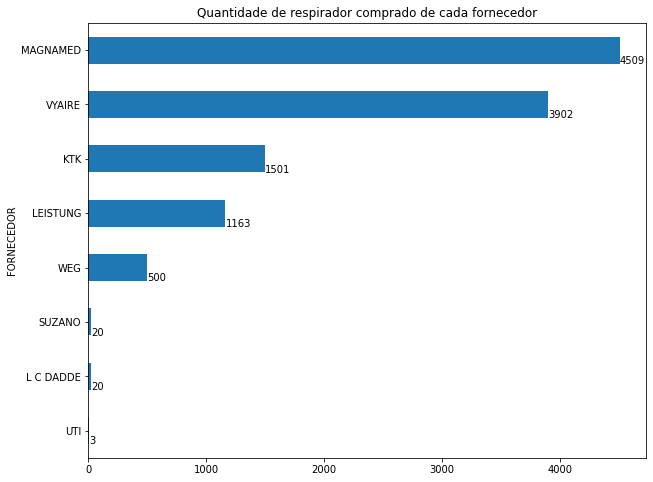

FORNECEDOR
MAGNAMED     4509
VYAIRE       3902
KTK          1501
LEISTUNG     1163
WEG           500
SUZANO         20
L C DADDE      20
UTI             3
Name: QUANTIDADE, dtype: int64

In [288]:
ax = df.groupby('FORNECEDOR')['QUANTIDADE'].sum().sort_values(ascending = True).plot.barh(figsize = (10,8))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y()  ))
plt.title('Quantidade de respirador comprado de cada fornecedor')
plt.show()
df.groupby('FORNECEDOR')['QUANTIDADE'].sum().sort_values(ascending = False)

# Valor total pago para cada fornecedor

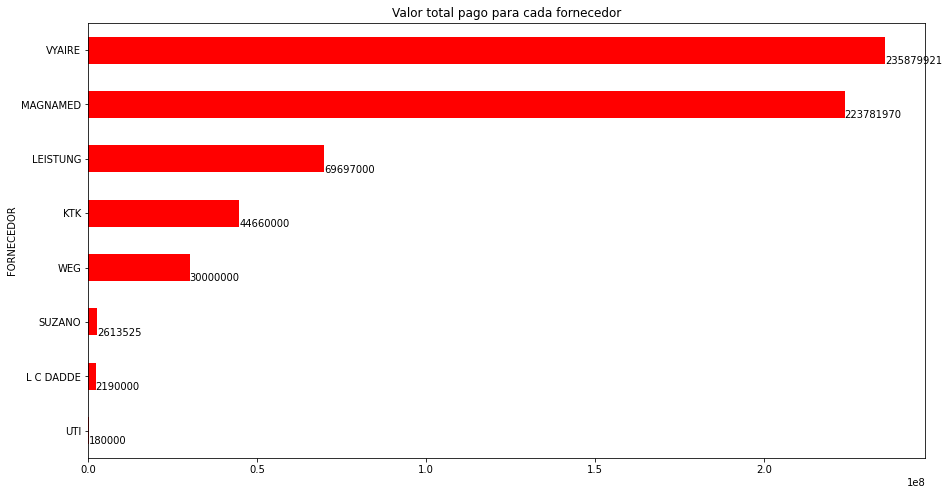

FORNECEDOR
KTK          4.466000e+07
L C DADDE    2.190000e+06
LEISTUNG     6.969700e+07
MAGNAMED     2.237820e+08
SUZANO       2.613525e+06
UTI          1.800000e+05
VYAIRE       2.358799e+08
WEG          3.000000e+07
Name: VALOR, dtype: float64

In [289]:
ax = df.groupby('FORNECEDOR')['VALOR'].sum().sort_values(ascending = True).plot.barh( figsize = (22,11),color = 'r')
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y()  ))
plt.title('Valor total pago para cada fornecedor')
plt.show()
df.groupby('FORNECEDOR')['VALOR'].sum()

# Quantidade total de respiradores comprados para os estados brasileiros

In [254]:
vendas_for = df.filter(['FORNECEDOR','QUANTIDADE'])
vendas_for['QUANTIDADE'].sum()

11618

*Foram comprados 11618 respiradores*

# Quantidade de respiradores por tipo

In [255]:
#Acrescentando mais uma coluna UNIDADE para armazenar o valor de cada respirador por compra, pois o dataset só possui quantidade e valor total
# com isso consigo um retirar um pouco mais de informação dos dados
df['UNIDADE'] = df['VALOR']/df['QUANTIDADE']
df.head()
df = df[['FORNECEDOR', 'DESTINO', 'TIPO','QUANTIDADE','UNIDADE', 'VALOR', 'DESTINATARIO','ESTADO/MUNICIPIO']]
df.head()


,FORNECEDOR,DESTINO,TIPO,QUANTIDADE,UNIDADE,VALOR,DESTINATARIO,ESTADO/MUNICIPIO
0,VYAIRE,RIO DE JANEIRO,UTI,40,60000.0,2400000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,ESTADO
1,VYAIRE,RIO DE JANEIRO,UTI,20,60000.0,1200000.0,LABORATÓRIO QUÍMICO FARMACÊUTICO DE AERONÁUTICA,ESTADO
2,MAGNAMED,RIO DE JANEIRO,UTI,25,60000.0,1500000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,ESTADO
3,KTK,RIO DE JANEIRO,UTI,15,60000.0,900000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,ESTADO
4,LEISTUNG,RIO DE JANEIRO,UTI,6,60000.0,360000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,ESTADO


In [256]:
df['TIPO'].value_counts()

TRANSPORTE        919
UTI               711
TRANSPORTE USA     50
Transporte USA     10
Transporte          2
Name: TIPO, dtype: int64

*Temos dois tipos de respiradores UTI e de Transporte. Vou separar cada tipo em uma variável*

In [257]:
#tipo UTI
tipo_uti = df[df['TIPO'] == 'UTI']
tipo_uti.describe()

,QUANTIDADE,UNIDADE,VALOR
count,711.000000,711.000000,7.110000e+02
mean,8.333333,60268.428256,5.033805e+05
std,12.740310,4671.588520,7.680492e+05
min,1.000000,60000.000000,6.000000e+04
25%,2.000000,60000.000000,1.200000e+05
50%,5.000000,60000.000000,3.000000e+05
75%,10.000000,60000.000000,6.000000e+05
max,120.000000,170081.650000,7.200000e+06


*Os respiradores do tipo UTI tiveram preços que variaram de 60000 reais a 170081,65 reais*

In [258]:
#Tipo Transporte
tipo_transporte = df[df['TIPO'] != 'UTI']
tipo_transporte.describe()

,QUANTIDADE,UNIDADE,VALOR
count,981.000000,981.000000,9.810000e+02
mean,5.803262,42015.227523,2.559622e+05
std,10.301131,13322.893226,5.084296e+05
min,1.000000,18500.000000,2.000000e+04
25%,1.000000,20000.000000,4.829000e+04
50%,2.000000,48290.000000,9.658000e+04
75%,5.000000,48290.000000,2.414500e+05
max,150.000000,63125.970000,7.243500e+06


*Os respiradores do tipo Transporte tiveram preços que variaram de 18500 reais a 63125,97 reais*

In [259]:
tipo_uti['QUANTIDADE'].sum()

5925

*Foram comprados 5925 respiradores do tipo UTI*

In [260]:
tipo_transporte['QUANTIDADE'].sum()

5693

*Foram comprados 5693 respiradores do tipo Transporte*

In [261]:
df['QUANTIDADE'].sum()

11618

*Foram comprados no total 11618 respiradores.*

# Valor gasto para o compra de respiradores para cada estado

In [262]:
df.groupby('DESTINO')['VALOR'].sum().sort_values(ascending = False)


DESTINO
RIO DE JANEIRO         62783213.56
SÃO PAULO              59024158.79
RIO GRANDE DO SUL      49425394.32
MINAS GERAIS           48680975.66
BAHIA                  41010489.70
PARANA                 37838078.95
GOIAS                  36047447.61
PARA                   24559450.00
PARAIBA                19122570.00
CEARA                  18705567.46
MATO GROSSO DO SUL     18646612.38
RIO GRANDE DO NORTE    16840710.00
MARANHÃO               16321010.00
DISTRITO FEDERAL       15248099.40
AMAZONAS               15112784.90
RONDONIA               15019670.00
PERNAMBUCO             13575869.40
ESPIRITO SANTO         13330450.00
MATO GROSSO            12787707.91
ALAGOAS                11593870.00
TOCANTINS              10238850.00
SERGIPE                 9891490.00
PIAUI                   9753460.00
ACRE                    9029000.00
RORAIMA                 8584130.00
AMAPA                   8125960.00
SANTA CATARINA          7705395.97
Name: VALOR, dtype: float64

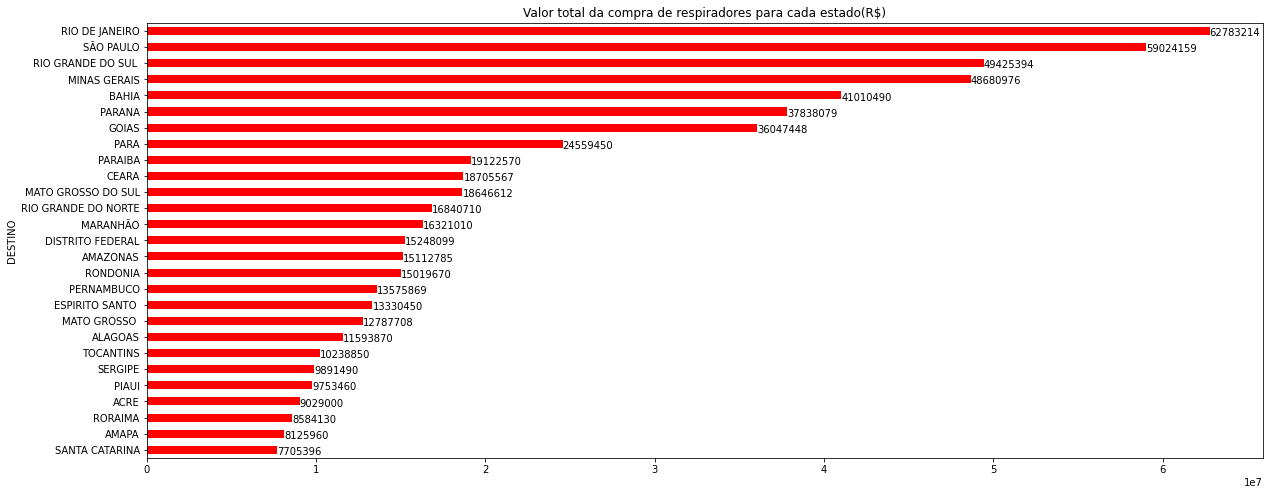

In [263]:
ax = df.groupby('DESTINO')['VALOR'].sum().sort_values(ascending = True).plot.barh(color= 'r',figsize = (20,8))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))
plt.title('Valor total da compra de respiradores para cada estado(R$)')
plt.show()




# Valor total


In [264]:
df['VALOR'].sum()

609002416.01

*A compra dos respiradores totalizou 609 002 416,01 reais. Lembrando que nesse total não temos a compra dos respiradores enviados para o Líbano *

# Quantidade de respirador (UTI,TRANSPORTE) comprado para cada estado

In [265]:
x = tipo_uti.groupby('DESTINO')['QUANTIDADE'].sum()
y = tipo_transporte.groupby('DESTINO')['QUANTIDADE'].sum()


x = x.to_frame().reset_index()
y = y.to_frame().reset_index()
x = x.rename(columns={'QUANTIDADE':'QUANT_UTI'})
y = y.rename(columns={'QUANTIDADE':'QUANT_TRANSP'})


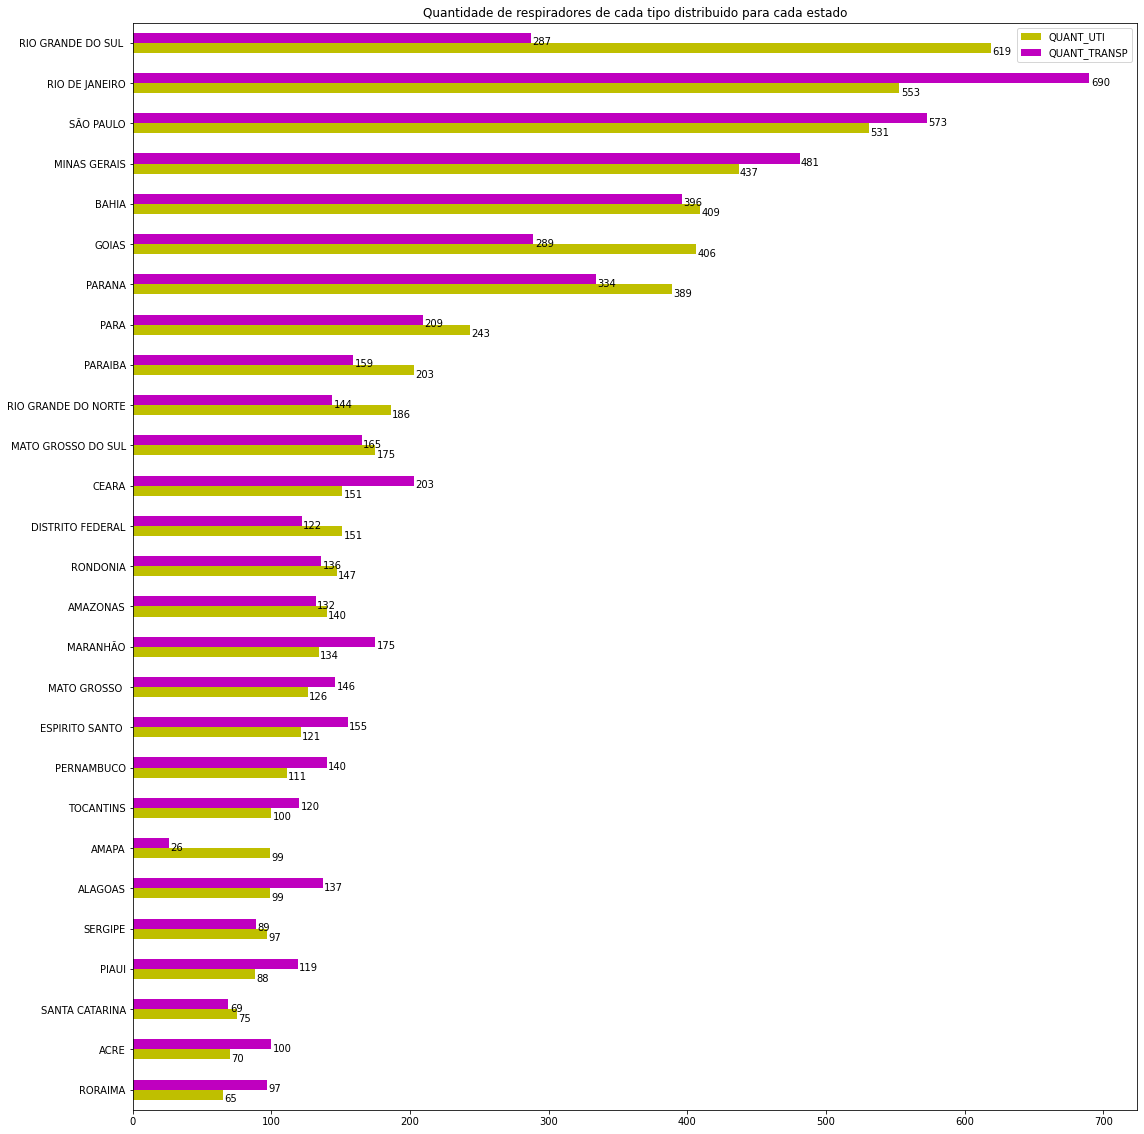

In [266]:




graf = pd.merge(x,y)
graf = graf.sort_values('QUANT_UTI',ascending = True)
ax = graf.plot.barh(figsize = (18,20),color = ('y','m'))
for p in ax.patches:
    b=p.get_bbox()
    ax.get_width = 1.5
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))   
plt.title('Quantidade de respiradores de cada tipo distribuido para cada estado')
plt.yticks(np.arange(27),graf['DESTINO'][:].values)
plt.show()


In [267]:
graf

,DESTINO,QUANT_UTI,QUANT_TRANSP
22,RORAIMA,65,97
0,ACRE,70,100
23,SANTA CATARINA,75,69
17,PIAUI,88,119
24,SERGIPE,97,89
1,ALAGOAS,99,137
2,AMAPA,99,26
26,TOCANTINS,100,120
16,PERNAMBUCO,111,140
7,ESPIRITO SANTO,121,155


# Quantidade total de respiradores enviados para cada estado

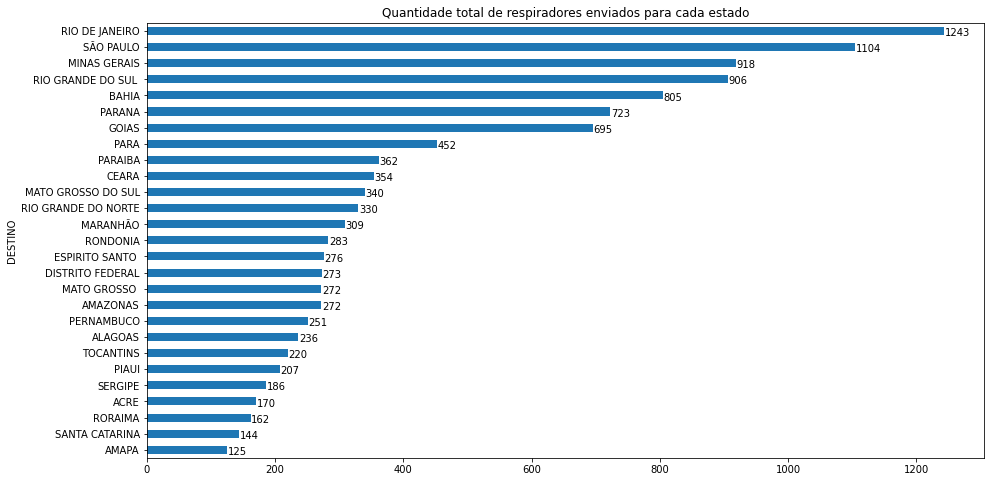

DESTINO
ACRE                    170
ALAGOAS                 236
AMAPA                   125
AMAZONAS                272
BAHIA                   805
CEARA                   354
DISTRITO FEDERAL        273
ESPIRITO SANTO          276
GOIAS                   695
MARANHÃO                309
MATO GROSSO             272
MATO GROSSO DO SUL      340
MINAS GERAIS            918
PARA                    452
PARAIBA                 362
PARANA                  723
PERNAMBUCO              251
PIAUI                   207
RIO DE JANEIRO         1243
RIO GRANDE DO NORTE     330
RIO GRANDE DO SUL       906
RONDONIA                283
RORAIMA                 162
SANTA CATARINA          144
SERGIPE                 186
SÃO PAULO              1104
TOCANTINS               220
Name: QUANTIDADE, dtype: int64

In [268]:
ax = df.groupby('DESTINO')['QUANTIDADE'].sum().sort_values().plot.barh(figsize = (15,8))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))
plt.title('Quantidade total de respiradores enviados para cada estado')

plt.show()
df.groupby('DESTINO')['QUANTIDADE'].sum()

# Na coluna ESTADO/MUNICIPIO, existe um detalhe nos registros...


In [269]:
df['ESTADO/MUNICIPIO'].value_counts()

MUNICIPIO    1387
ESTADO        281
ESTADO         24
Name: ESTADO/MUNICIPIO, dtype: int64

Na contagem de registros, o ESTADO aparece duas vezes, pois em um registro está escrito 'ESTADO' e no outro está escrito 'ESTADO '. Esse espaço no final fez com que os dois registro fossem contados como diferentes. Resolvendo o problema...

In [270]:
for index, row in df.iterrows():
    if row['ESTADO/MUNICIPIO'] == 'ESTADO ':
        df.loc[index,'ESTADO/MUNICIPIO'] = 'ESTADO'

In [271]:
df['ESTADO/MUNICIPIO'].value_counts()

MUNICIPIO    1387
ESTADO        305
Name: ESTADO/MUNICIPIO, dtype: int64

Problema resolvido.

# Respiradores distribuidos para estados e municípios(Quantidade e valor)

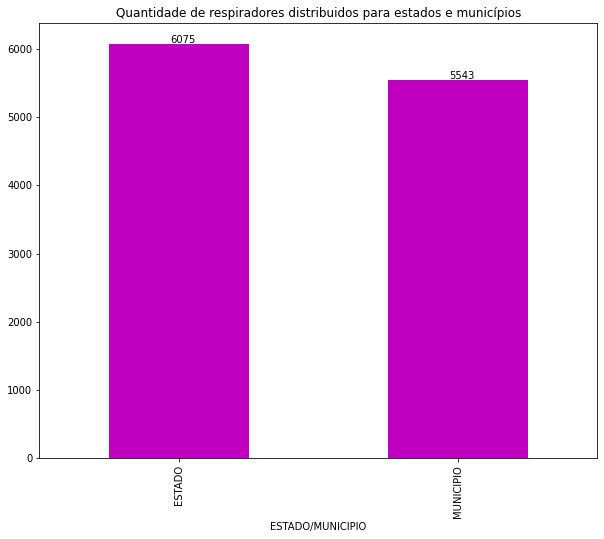

In [272]:
df.groupby('ESTADO/MUNICIPIO')['QUANTIDADE'].sum()
quant = df.groupby('ESTADO/MUNICIPIO')['QUANTIDADE'].sum().plot.bar(color = 'm',figsize = (10,8))
for p in quant.patches:
    b=p.get_bbox()
    quant.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03 , b.y1 + 15 ))
plt.title('Quantidade de respiradores distribuidos para estados e municípios')
plt.show()



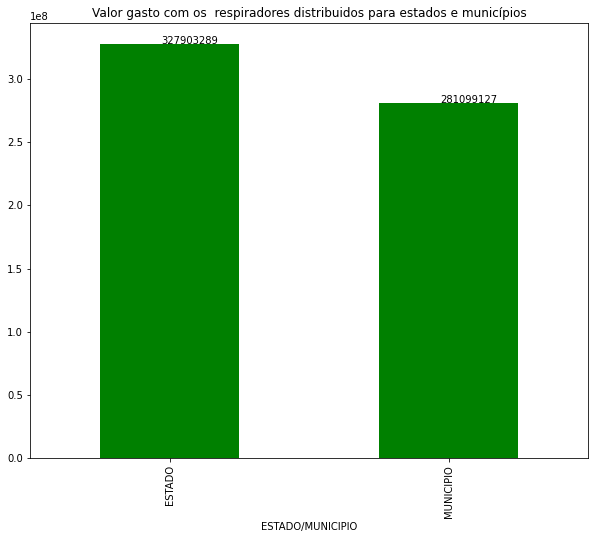

In [273]:
valor = df.groupby('ESTADO/MUNICIPIO')['VALOR'].sum().plot.bar(color = 'g',figsize = (10,8))
for p in valor.patches:
    b=p.get_bbox()
    valor.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03 , b.y1 + 15 ))
plt.title('Valor gasto com os  respiradores distribuidos para estados e municípios')
plt.show()

# Conclusão

<h2>Conclusão</h2>

<p>Através da análise deste dataset conseguimos descrever e sintetizar  os registros de como foram as  compras de respiradores no Brasil em 2020, como:     nome de fornecedores quantidades de respiradores comprados, tipos de respiradores , entre outros detalhes que foram expostos.</p>
<p> Verificamos também a compra de respiradores que foram uma das  doações feitas para o Líbano, como  ajuda às vítimas da explosão que ocorreu na capital, Beirute, em Agosto deste ano. </p>
